<a href="https://colab.research.google.com/github/KwancheolShin/Understanding-information-and-AI-with-mathematics/blob/main/2layers_2node_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

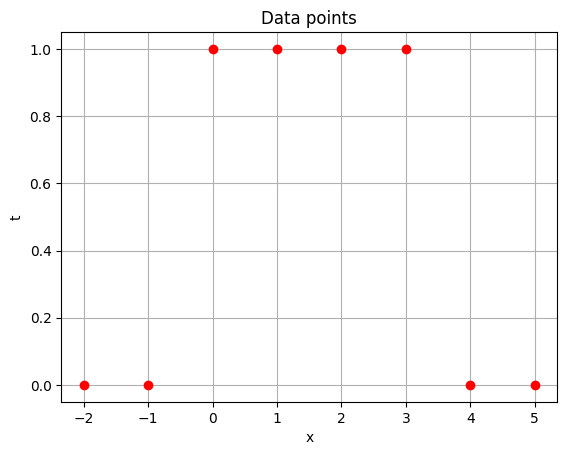

Epoch    0: Cost=2.004883
Epoch 10000: Cost=0.239461
Epoch 20000: Cost=0.205913
Epoch 30000: Cost=0.135159
Epoch 40000: Cost=0.089296
Epoch 50000: Cost=0.063173
Epoch 60000: Cost=0.047631
Epoch 70000: Cost=0.037725
Epoch 80000: Cost=0.031001
Epoch 90000: Cost=0.026195
Epoch 100000: Cost=0.022614
Epoch 110000: Cost=0.019857
Epoch 120000: Cost=0.017675
Epoch 130000: Cost=0.015910
Epoch 140000: Cost=0.014454
Epoch 150000: Cost=0.013235
Epoch 160000: Cost=0.012201
Epoch 170000: Cost=0.011312
Epoch 180000: Cost=0.010541
Epoch 190000: Cost=0.009866

최종 결과:
W1 [[6.96552117 4.83915985]]
B1 [[  3.19490514 -16.91665028]]


W2 [[ 1.04179384]
 [-1.06934156]]
B2 [[-0.01140123]]


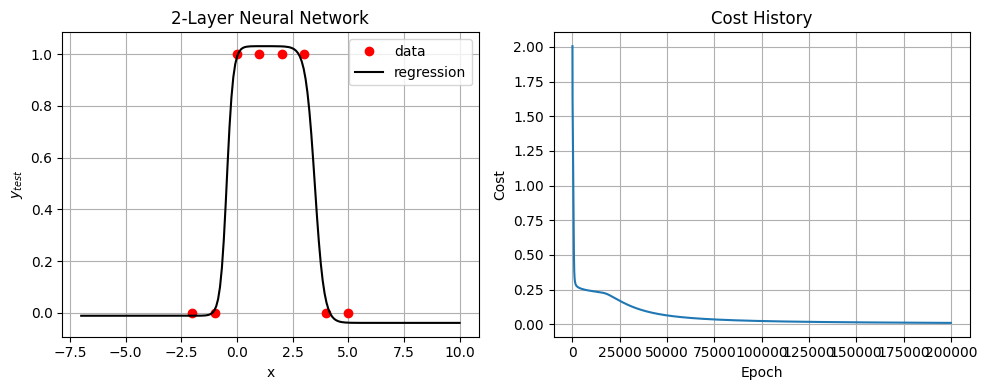

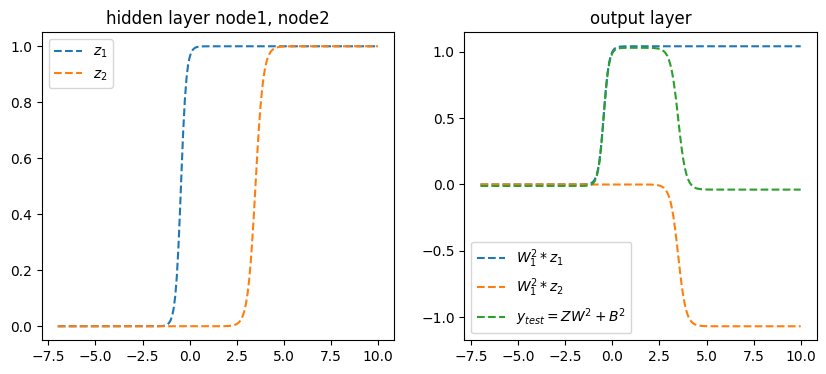

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 15 02:09:00 2025

@author: kcshi
"""

import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터
nn = 2 # number of hidden node
x = np.array([-2,-1,0,1,2,3,4,5])# 데이터와 은닉 노드의 갯수를 조작해보자
t = np.array([ 0, 0,1,1,1,1,0,0])
N = len(x)
x = x.reshape(N,1) # 모든 데이터를 한꺼번에 벡터 연산으로 처리하기 위해 [N,1]의 2차원 배열로 만든다.
t = t.reshape(N,1)

plt.plot(x, t, 'ro')
plt.xlabel('x')
plt.ylabel('t')
plt.title("Data points")
plt.grid(True)
plt.show()

# 2. 활성화 함수 및 도함수
phi  = lambda u: 1 / (1 + np.exp(-u))
dphi = lambda u: phi(u) * (1 - phi(u))

# 3. 파라미터 초기화
np.random.seed(0)
W1 = np.random.randn(1, nn) * 0.5     # 은닉층: 2개 노드, 각 (bias, weight)
B1 = np.random.randn(1, nn) * 0.5     # 출력층: (bias, w1, w2)
W2 = np.random.randn(nn, 1) * 0.5
B2 = np.random.randn(1,1)   * 0.5     # 출력층: (bias, w1, w2)

# 4. 비용 함수
def compute_cost(x, t, W1,B1,W2,B2):
    A1 = x*W1 + B1 #x는 N by 1 형태의 2차원 배열로 들어와 모든 데이터를 한꺼번에 처리한다.
    Z1 = phi(A1)
    y = np.matmul(Z1,W2) + B2
    e = y - t
    l = e**2
    cost = l.sum()
    return cost

# 5. 학습 설정
learning_rate = 0.01
epochs = 200000
cost_history = []

# 6. 학습 루프
for epoch in range(epochs):
    # forward
    A = x*W1 + B1 #x는 N by 1 형태의 2차원 배열로 들어와 모든 데이터를 한꺼번에 처리한다.
    Z = phi(A)
    y_pred = np.matmul(Z,W2) + B2
    e = y_pred - t
    l = e**2

    #backward
    dl_de = 2*e
    dl_dy_pred = dl_de

    dl_dW2 = np.matmul(Z.T,dl_dy_pred) #.T 는 전치행렬 연산이고 .matmul은 행렬곱을 수행한다.
    dl_dB2 = np.sum(dl_dy_pred) #1/N은 생략해도 무방. 모든 데이터에 대한 합을 구한다.
    dl_dZ = dl_dy_pred*W2.T

    dl_dA = Z*(1-Z)*dl_dZ #아다마르 곱을 수행한다.
    dl_dW1 = np.matmul(x.T,dl_dA)
    dl_dB1 = dl_dA.sum(axis=0)

    # 경사하강 수행
    W1 -=learning_rate*dl_dW1
    B1 -=learning_rate*dl_dB1

    W2 -=learning_rate*dl_dW2
    B2 -=learning_rate*dl_dB2

    # 비용 기록
    cost = compute_cost(x, t, W1,B1,W2,B2)
    cost_history.append(cost)

    if epoch % 10000 == 0:
        print(f"Epoch {epoch:4d}: Cost={cost:.6f}")

# 7. 결과 출력
print("\n최종 결과:")
print("W1", W1)
print("B1",B1)
print("\n")
print("W2", W2)
print("B2", B2)
# 8. 결과 시각화
x_test = np.linspace(-7,10, 200).reshape(-1,1) #reshape(-1,1)로 2차원 배열로 만든다
A_test = x_test*W1 + B1
Z_test = phi(A_test)
y_test= np.matmul(Z_test,W2) + B2

# 결과 & 훈련 과정 출력
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, t, 'ro', label='data')
plt.plot(x_test, y_test, 'k', label='regression')
plt.xlabel('x')
plt.ylabel(r'$y_{test}$')
plt.title('2-Layer Neural Network')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost History')
plt.grid(True)
plt.tight_layout()
plt.show()

# 은닉층 1번과 2번 노드 출력
z1 = phi(x_test*W1[:,0] + B1[0,0])
z2 = phi(x_test*W1[:,1] + B1[0,1])
#z3 = phi(x_test*W1[:,2] + B1[0,2])


plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(x_test,z1,'--',label = r'$z_1$')
plt.plot(x_test,z2,'--',label = r'$z_2$')
#plt.plot(x_test,z3,'--',label = r'$z_3$')

plt.title('hidden layer node1, node2')
plt.legend()


plt.subplot(1,2,2)
plt.plot(x_test,W2[0,0]*z1,'--',label = r'$W^2_{1}*z_1$')
plt.plot(x_test,W2[1,0]*z2,'--',label = r'$W^2_{1}*z_2$')
#plt.plot(x_test,W2[2,0]*z3,'--',label = r'$W^2_{1}*z_3$')
plt.plot(x_test,y_test,'--',label = r'$y_{test} = ZW^2+B^2$')
plt.title('output layer')
plt.legend()
plt.show()

